# Deep Learning Approaches for DeepFake Detection and Generation

##### Work assembled by Alejandro Gonçalves (2022055664), António Romão (202108704) and Francisca Mihalache (202206022).

## Table of Contents

1. [Introduction](#1-introduction)

2. [Dataset](#2-dataset)
   - 2.1. [Dataset Description](#21-dataset-description)  
   - 2.2 [Exploratory Data Analysis](#22-exploratory-data-analysis)  
      - 2.2.1. [Define paths](#221-define-paths)
      - 2.2.2. [Extract ZIP files](#222-extract-zip-files)
      - 2.2.3. [Visualize images per class](#223-visualize-images-per-class)
      - 2.2.4. [Create unified dataframe with labels](#224-create-unified-dataframe-with-labels)
      - 2.2.5. [Check basic info](#225-check-basic-info)
      - 2.2.6. [Check corrupted images](#226-check-corrupted-images)
      - 2.2.7. [Visualize random samples](#227-visualize-random-samples)
      - 2.2.8. [Check image sizes and modes](#228-check-image-sizes-and-modes)
      - 2.2.9. [Visualize size distribution](#229-visualize-size-distribution)

3. [Data Preprocessing](#3-data-preprocessing)
   - 3.1 [Image Loading](#31-image-loading)  
   - 3.2 [Image Resizing](#32-image-resizing)  
   - 3.3 [Normalization](#33-normalization)  
   - 3.4 [Data Augmentation](#34-data-augmentation)  

4. [Discriminative Model —> DeepFake Classification](#4-discriminative-model--deepfake-classification)
   - 4.1 [Model Selection](#41-model-selection)  
   - 4.2 [Model Architecture](#42-model-architecture)  
   - 4.3 [Loss Function](#43-loss-function)  
   - 4.4 [Optimizer and Hyperparameters](#44-optimizer-and-hyperparameters)  
   - 4.5 [Training Procedure](#45-training-procedure)  
   - 4.6 [Validation](#46-validation)  

5. [Classification Results](#5-classification-results)
   - 5.1 [Training Curves](#51-training-curves)  
   - 5.2 [Evaluation Metrics](#52-evaluation-metrics)  
   - 5.3 [Confusion Matrix](#53-confusion-matrix)  
   - 5.4 [Error Analysis](#54-error-analysis)  

6. [Generative Model —> DeepFake Generation](#6-generative-model--deepfake-generation)
   - 6.1 [Model Selection](#61-model-selection)  
   - 6.2 [Model Architecture](#62-model-architecture)  
   - 6.3 [Training Procedure](#63-training-procedure)  

7. [Generation Results](#7-generation-results)
   - 7.1 [Generated Image Samples](#71-generated-image-samples)  
   - 7.2 [Visual Quality Evaluation](#72-visual-quality-evaluation)  
   - 7.3 [Discussion](#73-discussion)  

8. [Model Improvements and Experiments](#8-model-improvements-and-experiments)
   - 8.1 [Baseline Model](#81-baseline-model)  
   - 8.2 [Improvements Applied](#82-improvements-applied)  
   - 8.3 [Comparison of Results](#83-comparison-of-results)  

9. [Conclusion](#9-conclusion)

10. [References](#10-references)

11. [Appendix](#11-appendix)

### 1. Introduction
[[go back to the top]](#table-of-contents)

Deep generative models have significantly improved in recent years, making it possible to create highly realistic synthetic images known as deepfakes. These images are generated using advanced deep learning techniques such as diffusion models, generative adversarial networks (GANs), and autoencoders. While these technologies have useful applications in entertainment, data augmentation, and content creation, they also introduce serious risks, including identity manipulation, misinformation, and security threats. As a result, the ability to both detect and generate deepfake images has become an important problem in deep learning.

This project addresses two complementary tasks: **discriminative modeling** and **generative modeling**. The discriminative task consists of training models capable of distinguishing between real and fake images. This is formulated as a binary classification problem, where the model learns to map an input image to a label indicating whether the image is authentic or synthetic. Different architectures with increasing representational capacity will be explored and compared in order to evaluate their effectiveness for this task.

The generative task consists of training models capable of learning the underlying distribution of real images and generating new synthetic samples. Generative models provide insight into how deepfakes are created and allow analysis of their capabilities and limitations. Different generative approaches will be implemented and compared based on the visual quality and characteristics of the generated images.

This notebook follows an experimental and iterative approach. Multiple models will be implemented, evaluated, and progressively improved based on observed results. The performance of discriminative models will be assessed using standard classification metrics, while generative models will be evaluated qualitatively by analyzing the generated samples. The objective is to understand the behavior of different deep learning approaches and evaluate their suitability for deepfake detection and generation.

### 2. Dataset
[[go back to the top]](#table-of-contents)

This project uses the DeepFakeFace (DFF) dataset, which is publicly available on [Hugging Face](https://huggingface.co/datasets/OpenRL/DeepFakeFace). 


The dataset was specifically created to evaluate the ability of deep learning models to distinguish between real and AI-generated face images. It contains a total of 120,000 images, divided into two main classes: real images and fake images.

The real images consist of authentic face photographs collected from the `IMDB-WIKI dataset`, representing real individuals under different conditions, including variations in pose, lighting, and facial expression. The fake images were generated using state-of-the-art generative models, including Stable Diffusion v1.5, Stable Diffusion Inpainting, and InsightFace. These models are capable of producing highly realistic synthetic faces, making the classification task more challenging.

This dataset is suitable for both discriminative and generative tasks. For the discriminative task, the real and fake labels allow training models to perform binary classification. For the generative task, the real images provide the target distribution that generative models aim to learn and reproduce.

Before training the models, the dataset will be explored and preprocessed, including inspecting its structure, defining training, validation, and test splits, and applying necessary transformations such as resizing and normalization.

#### 2.1. Dataset Structure
[[go back to the topic]](#2-dataset)

The DeepFakeFace dataset is distributed in four compressed (.zip) files, each containing 30,000 images. The dataset follows the same directory structure as the original IMDB-WIKI dataset.

The four files are:

- **wiki.zip** — contains 30,000 real face images selected from the original IMDB-WIKI dataset. These images represent authentic human faces and serve as the real class for the discriminative task.

- **text2img.zip** — contains 30,000 fake images generated using the Stable Diffusion v1.5 model. These images were generated using text-to-image generation.

- **inpainting.zip** — contains 30,000 fake images generated using the Stable Diffusion Inpainting model. This technique modifies parts of existing images to create synthetic variations.

- **insight.zip** — contains 30,000 fake images generated using the InsightFace toolbox, which produces realistic synthetic face images.

In total, the dataset contains 120,000 images: 30,000 real images and 90,000 fake images generated using three different generative models.

After extraction, the images can be accessed and organized for exploratory data analysis, preprocessing, and model training.

#### 2.2. Exploratory Data Analysis
[[go back to the topic]](#2-dataset)

Before training any models, it is important to explore the dataset to understand its structure, contents, and distribution. This step helps verify that the data was extracted correctly, identifies any data integrity issues such as corrupted files, and takes a closer look at the known imbalance between real and fake images.

The exploratory data analysis includes:

- Inspecting the directory structure

- Counting the number of images in each class

- Analyzing class distribution and imbalance

- Checking for corrupted files and data integrity

- Visualizing random sample images from each generative source

- Examining image properties such as spatial dimensions and color channels (e.g., RGB vs Grayscale)

This analysis provides a clear understanding of the dataset and ensures it is ready for preprocessing and model training.

#### Imports

In [3]:
import os
import zipfile
from pathlib import Path
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from tqdm import tqdm

sns.set(style="whitegrid")

##### 2.2.1. Define paths
[[go back to the topic]](#22-exploratory-data-analysis)

In [4]:
# Zips are inside the "datasets/" folder at the project root
DATA_DIR = Path("datasets")

ZIP_FILES = {
    "real": DATA_DIR / "wiki.zip",
    "text2img": DATA_DIR / "text2img.zip",
    "inpainting": DATA_DIR / "inpainting.zip",
    "insight": DATA_DIR / "insight.zip",
}

EXTRACT_DIR = DATA_DIR / "extracted"
EXTRACT_DIR.mkdir(parents=True, exist_ok=True)

# Optional sanity check
for name, p in ZIP_FILES.items():
    assert p.exists(), f"Missing file for {name}: {p.resolve()}"
print("All zip files found.")
print("Extract dir:", EXTRACT_DIR.resolve())

All zip files found.
Extract dir: C:\Users\aleja\OneDrive\Documentos\GitHub\Deep-Learning-for-fake-detection-and-generation\datasets\extracted


##### 2.2.2. Extract ZIP files
[[go back to the topic]](#22-exploratory-data-analysis)

In [5]:
def extract_zip(zip_path, extract_to):
    folder_name = zip_path.stem
    target_path = extract_to / folder_name
    
    if target_path.exists():
        print(f"{folder_name} already extracted")
        return target_path
    
    print(f"Extracting {folder_name}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(target_path)
    
    return target_path


paths = {}
for key, zip_path in ZIP_FILES.items():
    paths[key] = extract_zip(zip_path, EXTRACT_DIR)

paths

wiki already extracted
text2img already extracted
inpainting already extracted
insight already extracted


{'real': WindowsPath('datasets/extracted/wiki'),
 'text2img': WindowsPath('datasets/extracted/text2img'),
 'inpainting': WindowsPath('datasets/extracted/inpainting'),
 'insight': WindowsPath('datasets/extracted/insight')}

##### 2.2.3. Visualize images per class
[[go back to the topic]](#22-exploratory-data-analysis)


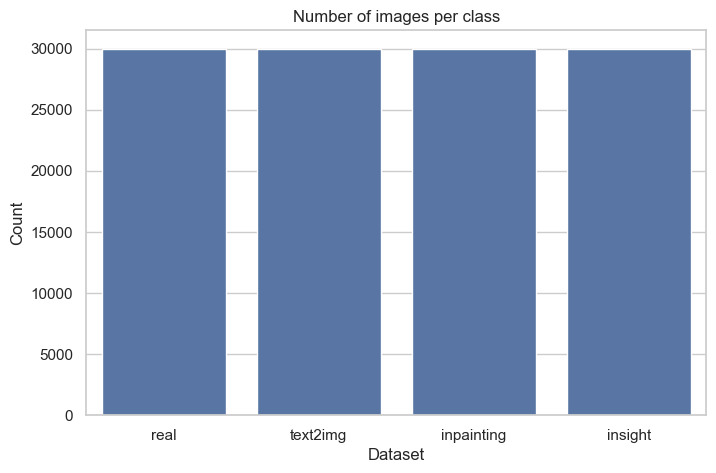

In [6]:
def count_images(folder):
    return len(list(folder.rglob("*.png"))) + len(list(folder.rglob("*.jpg")))

counts = {}
for name, path in paths.items():
    counts[name] = count_images(path)

counts_df = pd.DataFrame.from_dict(counts, orient="index", columns=["count"])

plt.figure(figsize=(8,5))
sns.barplot(x=counts_df.index, y=counts_df["count"])
plt.title("Number of images per class")
plt.ylabel("Count")
plt.xlabel("Dataset")
plt.show()

##### 2.2.4. Create unified dataframe with labels
[[go back to the topic]](#22-exploratory-data-analysis)

In this step, we consolidate the dataset into a single Pandas DataFrame containing three essential columns:

- **path:** The file path to the image on disk. This is required by the PyTorch Dataset class to efficiently load images into memory in batches during training (lazy loading), rather than loading all 120,000 images at once.

- **label:** The binary target ("real" or "fake"). This is the only variable the discriminative model will learn to predict.

- **source:** The exact origin of the image (e.g., "wiki", "text2img", "inpainting", "insight").

While the label is sufficient to train the model, retaining the source is a strategic choice for our evaluation. It enables granular error analysis, for example, discovering if our model easily detects InsightFace fakes but fails against Stable Diffusion Inpainting. This detailed breakdown is essential to iteratively improve our proposed solutions via continuous observation of intermediate results , allowing us to motivate choices and justify architectural changes

In [8]:
data = []
for label, folder in paths.items():
    image_paths = list(folder.rglob("*.png")) + list(folder.rglob("*.jpg"))
    
    for path in image_paths:
        data.append({
            "path": str(path),
            "label": "real" if label == "real" else "fake",
            "source": label
        })

df = pd.DataFrame(data)
print(df.head())

                                                path label source
0  datasets\extracted\wiki\wiki\00\10049200_1891-...  real   real
1  datasets\extracted\wiki\wiki\00\10110600_1985-...  real   real
2  datasets\extracted\wiki\wiki\00\10126400_1964-...  real   real
3  datasets\extracted\wiki\wiki\00\102100_1970-10...  real   real
4  datasets\extracted\wiki\wiki\00\10525500_1916-...  real   real


In [9]:
# View 10 random rows from the dataset instead of just the first 5
print(df.sample(10))

# Or, even better, count how many images exist per source
print(df["source"].value_counts())

                                                     path label    source
103446  datasets\extracted\insight\insight\44\929844_1...  fake   insight
33699   datasets\extracted\text2img\text2img\12\254812...  fake  text2img
43007   datasets\extracted\text2img\text2img\43\330443...  fake  text2img
46368   datasets\extracted\text2img\text2img\54\426161...  fake  text2img
90285   datasets\extracted\insight\insight\01\10261601...  fake   insight
114406  datasets\extracted\insight\insight\81\23799981...  fake   insight
104817  datasets\extracted\insight\insight\49\32132049...  fake   insight
10254   datasets\extracted\wiki\wiki\34\21271734_1986-...  real      real
14851   datasets\extracted\wiki\wiki\49\36388049_1925-...  real      real
41998   datasets\extracted\text2img\text2img\40\122741...  fake  text2img
source
real          30000
text2img      30000
inpainting    30000
insight       30000
Name: count, dtype: int64


##### 2.2.5. Check basic info
[[go back to the topic]](#22-exploratory-data-analysis)

In [10]:
df.info()
print(df["label"].value_counts())
print(df["source"].value_counts())

<class 'pandas.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   path    120000 non-null  str  
 1   label   120000 non-null  str  
 2   source  120000 non-null  str  
dtypes: str(3)
memory usage: 2.7 MB
label
fake    90000
real    30000
Name: count, dtype: int64
source
real          30000
text2img      30000
inpainting    30000
insight       30000
Name: count, dtype: int64


In [11]:
df["path"].duplicated().sum()

0

##### 2.2.6. Check corrupted images
[[go back to the topic]](#22-exploratory-data-analysis)

In this step, we verify the structural integrity of every image file in the dataset. It is crucial to note that we are not evaluating the visual quality of the images (e.g., blurriness, bad lighting, or poorly generated deepfakes), but rather ensuring that the files themselves are not technically corrupted.

When downloading and extracting large datasets, files can sometimes become truncated, save as 0 bytes, or suffer from formatting errors. If the PyTorch DataLoader encounters one of these broken files during training, it will throw a fatal error and crash the entire training loop.

To prevent this, we iterate through our DataFrame and use the verify() method from the Pillow (PIL) library. Instead of loading the entire pixel matrix into memory, which would be computationally expensive and slow for 120000 images, verify() efficiently reads just the file header to confirm it is a valid and intact image. Any file that fails this check raises an exception, which we catch and append to a corrupted list. This allows us to identify and remove any problematic files before the model training begins.

In [12]:
corrupted = []

for path in tqdm(df["path"]):
    try:
        with Image.open(path) as img:
            img.verify()
    except Exception as e:
        corrupted.append((path, str(e)))

print(f"Corrupted files found: {len(corrupted)}")

100%|██████████| 120000/120000 [08:22<00:00, 238.60it/s]

Corrupted files found: 0


##### 2.2.7. Visualize random samples
[[go back to the topic]](#22-exploratory-data-analysis)

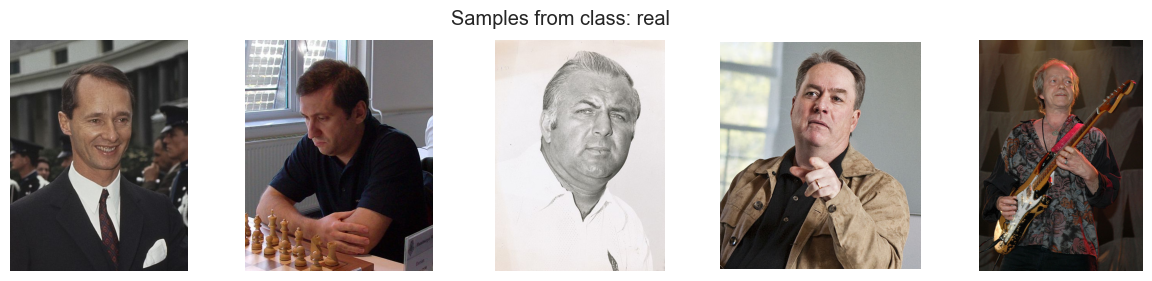

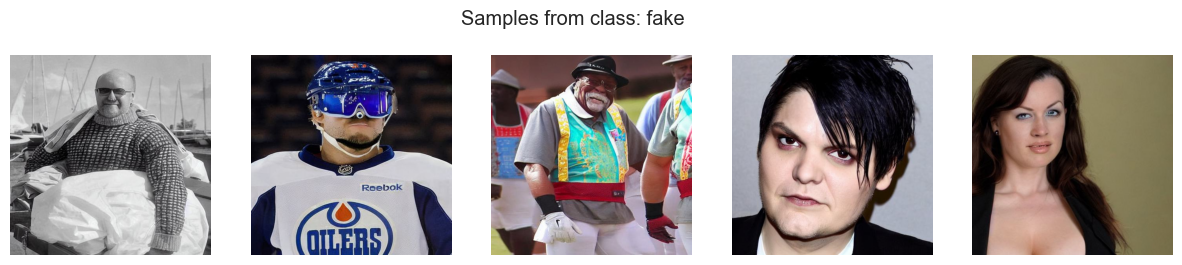

In [13]:
def show_samples(df, label, n=5):
    samples = df[df["label"] == label].sample(n)
    
    plt.figure(figsize=(15,3))
    
    for i, path in enumerate(samples["path"]):
        with Image.open(path) as img:
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.axis("off")
    
    plt.suptitle(f"Samples from class: {label}")
    plt.show()

show_samples(df, "real")
show_samples(df, "fake")

##### 2.2.8. Check image sizes and modes
[[go back to the topic]](#22-exploratory-data-analysis)

The statistical analysis of the image properties reveals critical structural variations in our dataset that must be explicitly handled before feeding the data into a neural network.

In [14]:
# CRITICAL: Initialize the empty list first
image_properties = []

# Reproducible sample
sample_df = df.sample(2000, random_state=42).reset_index(drop=True)

# Using itertuples() is significantly faster than iterrows()
for row in tqdm(sample_df.itertuples(index=False), total=len(sample_df)):
    try:
        with Image.open(row.path) as img:
            image_properties.append({
                "path": row.path,
                "width": img.size[0],
                "height": img.size[1],
                "mode": img.mode,
                # Using getattr to safely fetch attributes just like .get() in dicts
                "label": getattr(row, "label", None),
                "source": getattr(row, "source", None),
            })
    except Exception:
        # Skip corrupted/unreadable images
        continue

sizes_df = pd.DataFrame(image_properties)

print("--- Image Modes Found (sample) ---")
print(sizes_df["mode"].value_counts())

print("\n--- Image Size Statistics (overall, sample) ---")
display(sizes_df[["width", "height"]].describe())

if "label" in sizes_df.columns and sizes_df["label"].notna().any():
    print("\n--- Image Size Statistics (by label, sample) ---")
    display(sizes_df.groupby("label")[["width", "height"]].describe())

if "source" in sizes_df.columns and sizes_df["source"].notna().any():
    print("\n--- Image Size Statistics (by source, sample) ---")
    display(sizes_df.groupby("source")[["width", "height"]].describe())
    
print("\n--- RGB Consistency Check (sample) ---")
unique_modes = sizes_df["mode"].dropna().unique()
print("Unique modes:", unique_modes)

if len(unique_modes) == 1 and unique_modes[0] == "RGB":
    print("All sampled images are RGB.")
else:
    print("Non-RGB images found. You should convert images to RGB during preprocessing.")

100%|██████████| 2000/2000 [00:04<00:00, 499.59it/s]


--- Image Modes Found (sample) ---
mode
RGB     1936
L         44
RGBA      17
P          3
Name: count, dtype: int64

--- Image Size Statistics (overall, sample) ---


,width,height
count,2000.000000,2000.000000
mean,485.172500,510.157000
std,62.381026,80.383538
min,112.000000,150.000000
25%,500.000000,512.000000
50%,512.000000,512.000000
75%,512.000000,512.000000
max,640.000000,1049.000000



--- Image Size Statistics (by label, sample) ---


width                                                           \
        count        mean       std    min    25%    50%    75%    max   
label                                                                    
fake   1471.0  512.000000   0.00000  512.0  512.0  512.0  512.0  512.0   
real    529.0  410.572779  84.56938  112.0  400.0  440.0  440.0  640.0   

       height                                                              
        count        mean         std    min    25%    50%    75%     max  
label                                                                      
fake   1471.0  512.000000    0.000000  512.0  512.0  512.0  512.0   512.0  
real    529.0  505.032136  156.292718  150.0  375.0  533.0  622.0  1049.0


--- Image Size Statistics (by source, sample) ---


width                                                           \
            count        mean       std    min    25%    50%    75%    max   
source                                                                       
inpainting  476.0  512.000000   0.00000  512.0  512.0  512.0  512.0  512.0   
insight     467.0  512.000000   0.00000  512.0  512.0  512.0  512.0  512.0   
real        529.0  410.572779  84.56938  112.0  400.0  440.0  440.0  640.0   
text2img    528.0  512.000000   0.00000  512.0  512.0  512.0  512.0  512.0   

           height                                                              
            count        mean         std    min    25%    50%    75%     max  
source                                                                         
inpainting  476.0  512.000000    0.000000  512.0  512.0  512.0  512.0   512.0  
insight     467.0  512.000000    0.000000  512.0  512.0  512.0  512.0   512.0  
real        529.0  505.032136  156.292718  150.0  375.0  533.0  622.0  1049.0  
text2img    528.0  512.000000    0.000000  512.0  512.0  512.0  512.0   512.0


--- RGB Consistency Check (sample) ---
Unique modes: <StringArray>
['RGB', 'L', 'P', 'RGBA']
Length: 4, dtype: str
Non-RGB images found. You should convert images to RGB during preprocessing.


**1. Color Channels (Image Modes)**

Neural networks require strict uniformity in input tensor dimensions. A standard Convolutional Neural Network (CNN) expects a 3-channel input tensor of shape `[3, Height, Width]`. However, the dataset contains images with different color modes:

- **RGB (3 channels):** This is the standard color format and represents the vast majority of the dataset.
- **L (1 channel):** Grayscale images containing only intensity information. If used directly, these would produce tensors of shape `[1, Height, Width]`, which would be incompatible with models expecting three channels.
- **RGBA (4 channels) and P (palette mode):** These images contain either an additional alpha channel for transparency (RGBA) or indexed color palettes (P), resulting in a different channel structure.

**Solution:**  
To ensure consistency, all images will be converted to RGB format during the data loading phase using:

```python
img = img.convert("RGB")
```

This transformation standardizes all inputs to three channels while preserving the underlying visual content. This step ensures compatibility with the neural network architecture and prevents shape mismatch errors during training.


**2. Spatial Dimensions and Dataset Bias**

Analysis of image dimensions revealed a strong structural pattern in the dataset. All fake images generated by the diffusion models and InsightFace have a fixed resolution of **512×512 pixels**, while real images from the IMDB-WIKI dataset show significant variability, with dimensions ranging from **112×150 up to 640×1049 pixels**.

This discrepancy introduces a potential bias. Deep learning models can exploit unintended shortcuts in the data. If images with different aspect ratios are directly resized to a fixed resolution, real images may experience distortion due to stretching or interpolation, while fake images, already square, would be resized without distortion. This could allow the model to rely on geometric artifacts instead of learning meaningful facial authenticity features.

**Mandatory preprocessing step:**  
To mitigate this issue, a consistent resizing strategy will be applied. Images will first be resized while preserving their aspect ratio, followed by a center crop to obtain a fixed square resolution (e.g., 224×224 or 256×256). This ensures that both real and fake images are processed in a consistent way, reducing the risk of introducing unintended bias. By applying the same transformations to all images, the model is more likely to learn meaningful features related to facial authenticity rather than relying on differences caused by preprocessing.

This preprocessing step guarantees that all images have consistent dimensions and channel structure, making them suitable for training discriminative and generative models.

##### 2.2.9. Visualize size distribution
[[go back to the topic]](#22-exploratory-data-analysis)

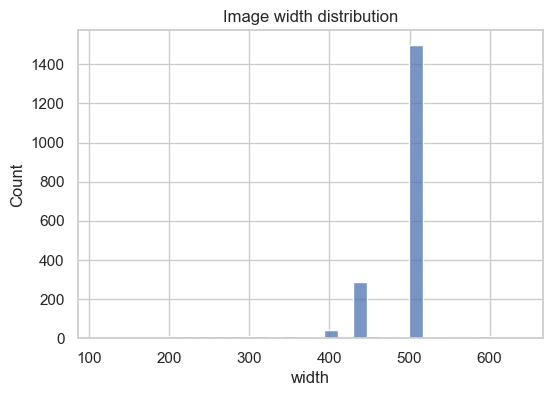

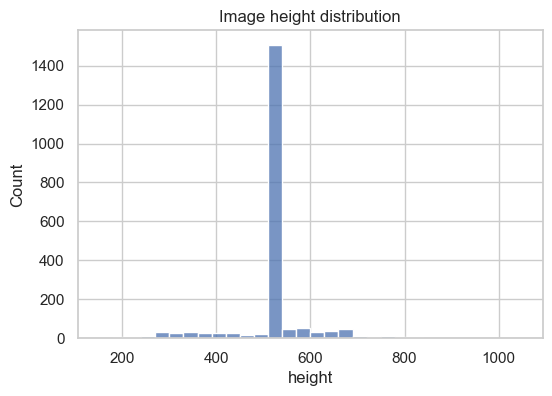

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(sizes_df["width"], bins=30)
plt.title("Image width distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(sizes_df["height"], bins=30)
plt.title("Image height distribution")
plt.show()

Looking at the histograms for image width and height, the overall pattern is very clear. There is a large and distinct peak at exactly **512×512 pixels**, which is not accidental. This resolution corresponds to the default generation size used by models such as **Stable Diffusion**, confirming that a significant portion of the fake images were generated at this standard resolution.

However, the dataset is not perfectly uniform. Beyond the main peak, there is noticeable variability in both width and height. Some images have widths as low as approximately `400 pixels`, and heights ranging between roughly `200 and 700 pixels`. These variations most likely originate from the real **IMDB-WIKI** photographs or from preprocessing steps such as face detection and cropping performed by pipelines like **InsightFace**.

This observation is important for two critical reasons: one technical, and one related to model validity.

Technically, deep learning frameworks like PyTorch operate on batches represented as stacked tensors. It is mathematically impossible to stack an image with shape `[3, 512, 512]` together with another image of shape `[3, 400, 600]`. Without uniform dimensions, the DataLoader will crash.

Crucially, from a machine learning perspective, this size discrepancy introduces a severe risk of Shortcut Learning (Data Leakage). Since 100% of our generated fake images are perfectly square `(512x512)` while real images vary in their rectangular dimensions, a naive resize operation would drastically squash and distort only the real images. The neural network would simply learn to classify "distorted/stretched" images as real and "proportionally crisp" images as fake, completely failing its true objective.

**Conclusion**

These findings show that applying a simple resize is not sufficient. Instead, the preprocessing pipeline must include a cropping strategy that preserves the original proportions of the images. A suitable approach is to first resize the image while maintaining its aspect ratio and then apply a center crop to obtain a fixed resolution, such as `224×224` or `256×256`.

This ensures that all images have consistent dimensions, which is required for batch processing in PyTorch, while avoiding geometric distortions that could introduce unintended bias. As a result, the dataset becomes uniform and properly structured, allowing the models to learn meaningful visual features rather than relying on artifacts caused by inconsistent image sizes.

In [16]:
# Save the unified DataFrame to a CSV file to avoid rebuilding it in future sessions
csv_path = DATA_DIR / "dataset_index.csv"
df.to_csv(csv_path, index=False)

print(f"DataFrame successfully saved to {csv_path.resolve()}")

DataFrame successfully saved to C:\Users\aleja\OneDrive\Documentos\GitHub\Deep-Learning-for-fake-detection-and-generation\datasets\dataset_index.csv


### 3. Data Preprocessing
[[go back to the top]](#table-of-contents)